In [ ]:
# importing the stuff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [12]:
data_2015 = pd.read_csv('2015.csv')
data_2016 = pd.read_csv('2016.csv')
data_2017 = pd.read_csv('2017.csv')
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')

data_2015.columns = [each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2015.columns]
data_2016.columns = [each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns = [each.replace("."," ") for each in data_2017.columns]
data_2017.columns = [each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2017.columns]
data_2018.columns = [each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2018.columns]
data_2019.columns = [each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2019.columns]


In [4]:
data_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country              158 non-null object
Region               158 non-null object
Happiness_Rank       158 non-null int64
Happiness_Score      158 non-null float64
Standard_Error       158 non-null float64
Economy              158 non-null float64
Family               158 non-null float64
Health               158 non-null float64
Freedom              158 non-null float64
Trust                158 non-null float64
Generosity           158 non-null float64
Dystopia_Residual    158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [14]:
print("Are There Missing Data? :", data_2015.isnull().any().any())
print(data_2015.isnull().sum())

('Are There Missing Data? :', False)
Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64


In [17]:
region_lists = list(data_2015['Region'].unique())
region_happiness_ratio = []
for each in region_lists:
    region = data_2015[data_2015['Region'] == each]
    region_happiness_rate = sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)

    
data = pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index = (data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


In [19]:
region_lists =list(data_2015['Region'].unique())
region_economy_ratio = []
for each in region_lists:
    region = data_2015[data_2015['Region']==each]
    region_economy_rate = sum(region.Economy)/len(region)
    region_economy_ratio.append(region_economy_rate)
    
data_economy = pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
new_index_economy = (data_economy['region_economy_ratio'].sort_values(ascending = True)).index.values
sorted_data_economy = data_economy.reindex(new_index_economy)
sorted_data_economy.head()

,region,region_economy_ratio
8,Sub-Saharan Africa,0.380473
9,Southern Asia,0.560486
5,Southeastern Asia,0.789054
4,Latin America and Caribbean,0.876815
6,Central and Eastern Europe,0.942438


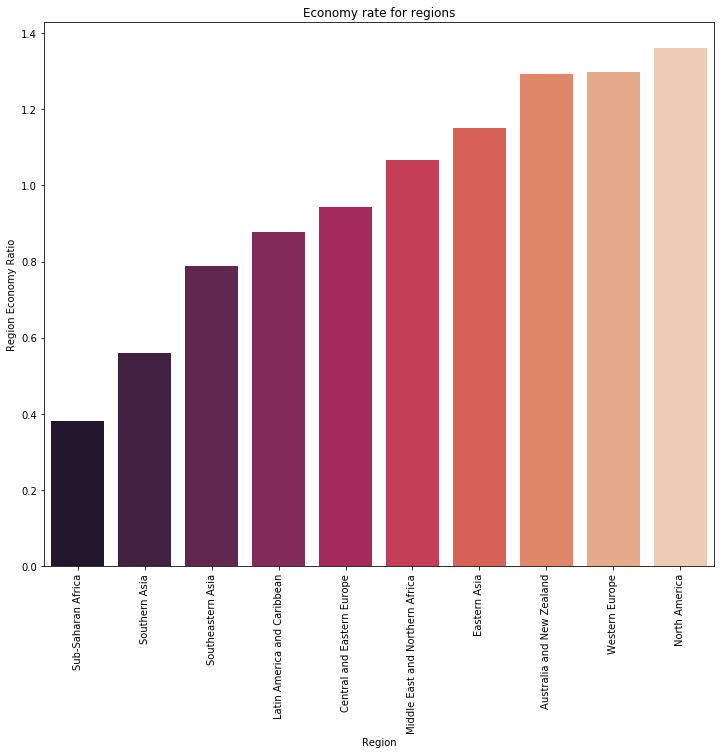

In [34]:
# bar plot
f,ax1 = plt.subplots(figsize = (12,10))
sns.barplot(x=sorted_data_economy['region'], y = sorted_data_economy['region_economy_ratio'],palette = "rocket",ax=ax1)
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Region Economy Ratio')
plt.title('Economy rate for regions')
plt.show()

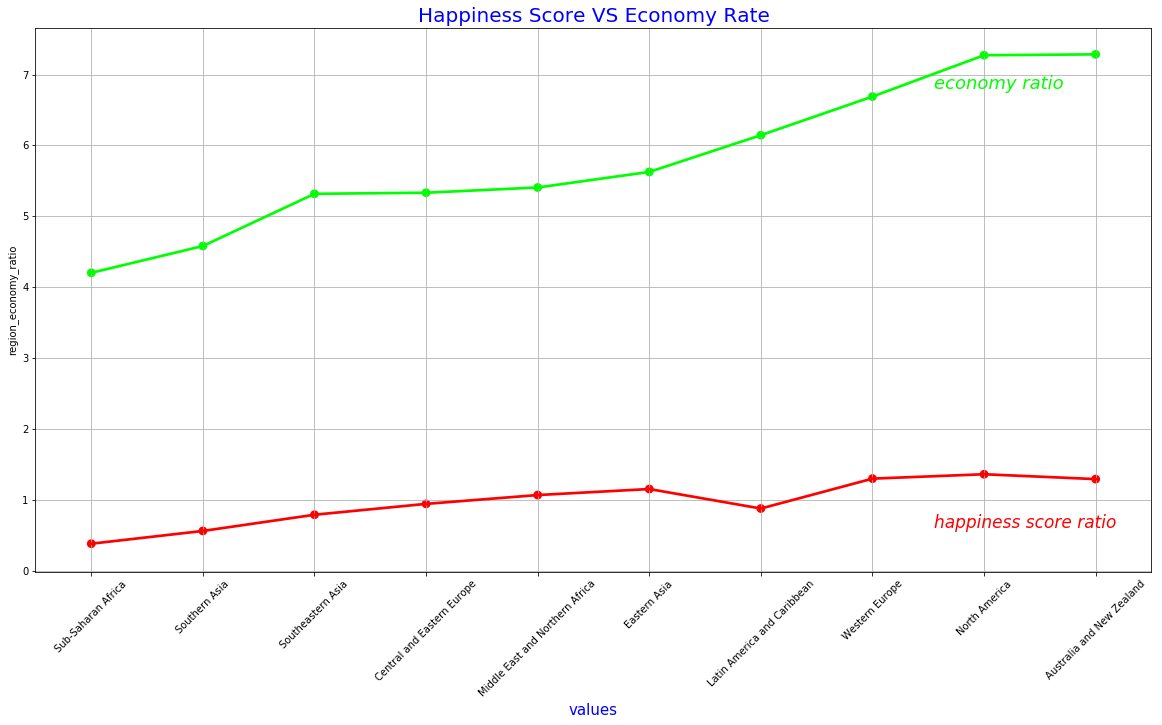

In [37]:
# point plot
data =pd.concat([sorted_data,sorted_data_economy['region_economy_ratio']],axis=1)
data.sort_values('region_happiness_ratio',inplace = True)

f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x='region',y='region_happiness_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='region',y='region_economy_ratio',data=data,color='red',alpha=0.8)
plt.text(7.55,0.6,'happiness score ratio',color = 'red',fontsize =17,style='italic')
plt.text(7.55,6.8,'economy ratio',color = 'lime',fontsize =18,style='italic')
plt.xticks(rotation=45)
plt.xlabel('Region',fontsize = 15,color ='blue')
plt.xlabel('values',fontsize = 15,color ='blue')
plt.title('Happiness Score VS Economy Rate', fontsize = 20,color='blue')
plt.grid()
plt.show()



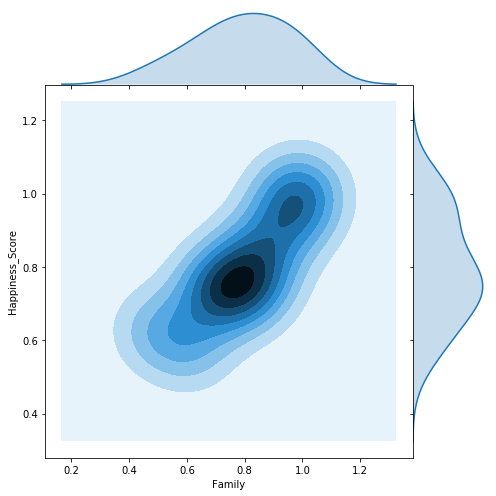

In [46]:
# joint Plot
d = pd.pivot_table(data_2015, index ='Region',values=['Happiness_Score','Family'])

d['Happiness_Score'] = d["Happiness_Score"]/max(d["Happiness_Score"])
d['Family'] = d["Family"]/max(d["Family"])
sns.jointplot(d.Family,d.Happiness_Score,kind='kde',height=7,space=0)
plt.savefig('graph.png')
plt.show()

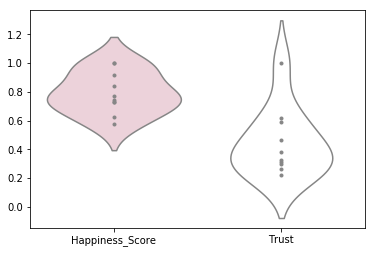

In [49]:
# ViolinPlot
d2 = pd.pivot_table(data_2015, index ='Region',values=['Happiness_Score','Trust'])
# to normalize 
d2['Happiness_Score'] = d2["Happiness_Score"]/max(d2["Happiness_Score"])
d2['Trust'] = d2["Trust"]/max(d2["Trust"])
pal = sns.cubehelix_palette(2,rot=5,dark=3)
sns.violinplot(data=d2,palette=pal,inner='points')
plt.show()

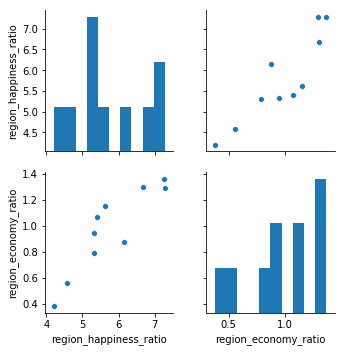

In [51]:
# pair plot
sns.pairplot(data)
plt.show()

In [56]:
data_2015['year'] = 2015
data_2016['year'] = 2016
data_2017['year'] = 2017

data_concat = pd.concat([data_2015,data_2016,data_2017],axis=0,sort=False)




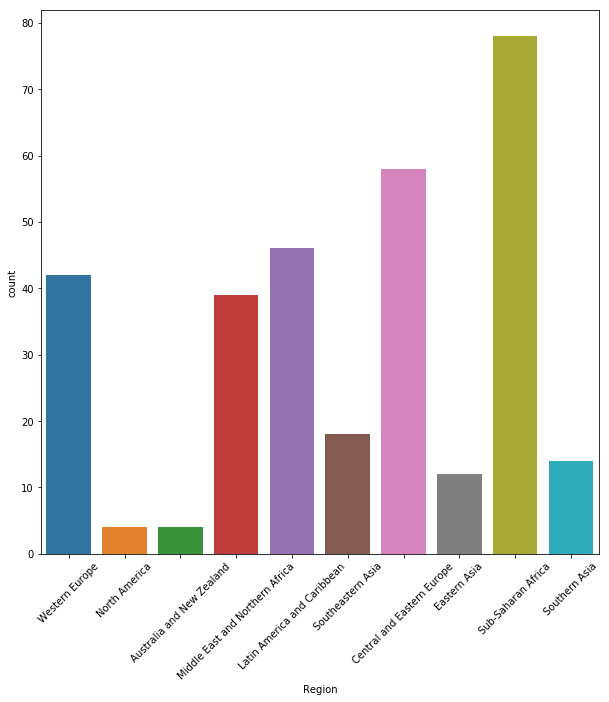

In [55]:
f,ax = plt.subplots(figsize = (10,10))
sns.countplot(data_concat.Region,ax=ax)
plt.xticks(rotation=45)
plt.show()